### **Import Libraries**

In [ ]:
#import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Load Data**

We load data and change one column as an index.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/3-Data Preprocessing/03/data.csv', index_col = 'client_id')
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


### **Type Casting**

Now, let's take a look at column types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


We should change type of `loadn-id` to object. Because even though it shows number, they are just ID.

In [ ]:
df['loan_id'] = df['loan_id'].astype('object')

Also, we change `repaid` as a category column, just because it shows 0 or 1 and they are kind of category.

In [ ]:
df['repaid'] = df['repaid'].astype('category')

Finally, just because we have two dates, we need to change data tyep to date format.

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

Now, let's take a look at data type here:

In [ ]:
df.dtypes

,0
loan_type,object
loan_amount,int64
repaid,category
loan_id,object
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64


### **Summary Information**

Now, for numerical columns, we can see a basic statistics:

In [ ]:
numeric_cols = df.select_dtypes(include=['number'])
summary = numeric_cols.describe()
summary

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


Also, we should see the status of `NULL` values:

In [ ]:
df.isnull().sum()

,0
loan_type,0
loan_amount,0
repaid,0
loan_id,0
loan_start,0
loan_end,0
rate,0


### **Find Outlier**

Let's see do we have any outlier data or not. Just becase we have only two numerical column, we only check outlier for `loan` and `rate`.:

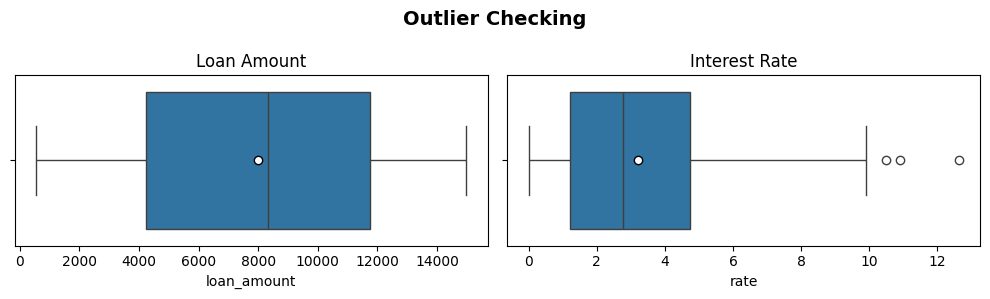

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

sns.boxplot(data=df, x='loan_amount', ax=ax1, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white",  "markeredgecolor":"black"})
ax1.set(title='Loan Amount')

sns.boxplot(data=df, x='rate', ax=ax2, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
ax2.set(title='Interest Rate')

fig.suptitle('Outlier Checking', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

We see we have some outlier for `rate`.

### **handle Outlier**

There are several ways to handle outliers:

##### **Square Root**

In this method we get square root for data:

In [ ]:
df['sqrt_rate'] = np.sqrt(df['rate'])

print("Skewness Before {}".format(df.rate.skew()))
print('Skewness After {}'.format(df.sqrt_rate.skew()))
print('')
print("Kurtosis Before {}".format(df.rate.kurt()))
print("Kurtosis After {}".format(df.sqrt_rate.kurt()))

Skewness Before 0.884204614329943
Skewness After 0.04964154055528862

Kurtosis Before 0.42437165143736433
Kurtosis After -0.6318437642052039


As much as the skewness and kurtosis is less, it show we have less outlier. Also, we can see distibution shape, as well.

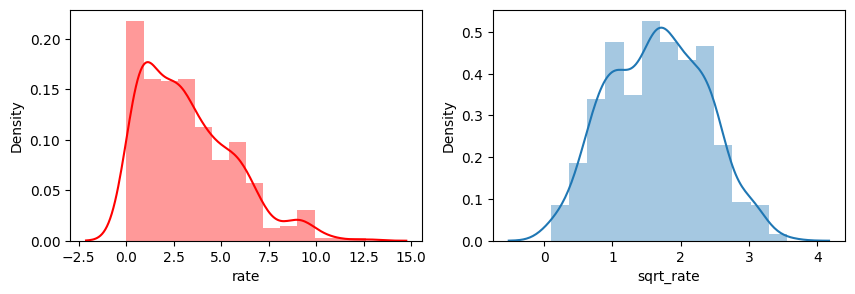

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))

sns.distplot(df['rate'],  ax=axes[0] , color='red')
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()

##### **Logarithm**

Another way is logarithm which is the opposite method of square root. Just keep in mind, this method is not applicable for negative values.

In [ ]:
df['log_rate'] = np.log(df['rate'])

print("Skewness Before {}".format(df.rate.skew()))
print('Skewness After {}'.format(df.log_rate.skew()))
print('')
print("Kurtosis Before {}".format(df.rate.kurt()))
print("Kurtosis After {}".format(df.log_rate.kurt()))

Skewness Before 0.884204614329943
Skewness After -1.5943217626331552

Kurtosis Before 0.42437165143736433
Kurtosis After 4.157026150198228


Also, we can see distibution shape, as well.

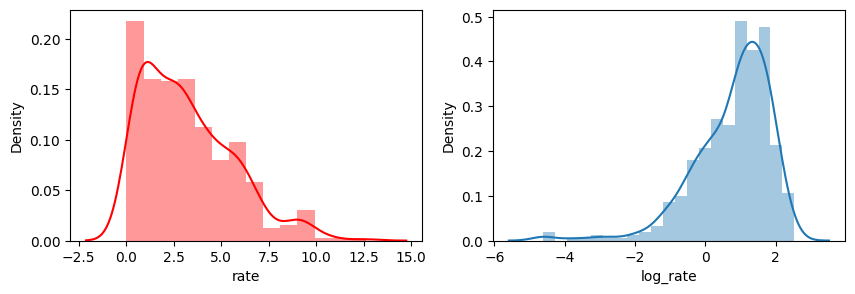

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))

sns.distplot(df['rate'],  ax=axes[0], color='red')
sns.distplot(df['log_rate'], ax=axes[1])

plt.show()

Now, we can see all together to make decision which method is superior.

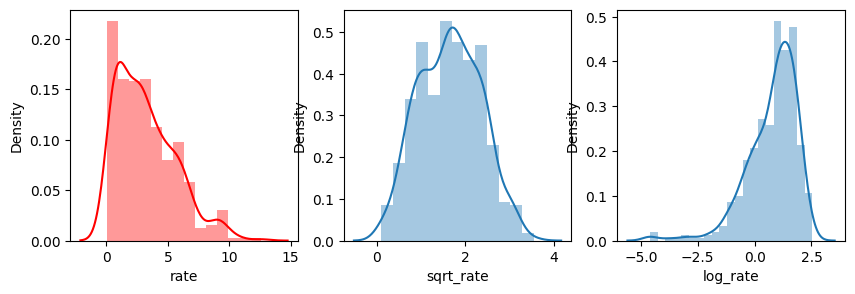

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

sns.distplot(df['rate'], ax=axes[0] , color='red')
sns.distplot(df['sqrt_rate'], ax=axes[1])
sns.distplot(df['log_rate'], ax=axes[2])

plt.show()

The results show us the best option is `square root` method in this project.